# Project: Customer Relationship Prediction
Univ.AI <br>
AI-1 Cohort-5

## Name of the people who worked on the project:


Link to presentation: *link here*

Link to slides: *link here*

Link to poster: *link here*

Any other information:*link here*

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, auc, f1_score,roc_auc_score)
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve

In [71]:
df = pd.read_csv("./orange_small_train.data", sep = "\t")


In [72]:
churn = pd.read_table('orange_small_train_churn.labels', header = None).loc[:, 0]


In [73]:
churn = pd.Series(churn)
df = df.assign(churn = churn)

In [74]:
s = df.shape[1] 

In [75]:
missing_perc = 20
min_count = int(((100 - missing_perc) / 100) * df.shape[0] + 1)
min_count

40001

In [76]:
#drop all missing and only continous variable
prefered_uniques = 10
# create a list of numeric values and less than prefered uniques categorical columns
fe_unique_columns = list(df.select_dtypes(include='number').columns) + list(
    (df.select_dtypes(include='object').nunique() < prefered_uniques).index[
        df.select_dtypes(include='object').nunique() < prefered_uniques])
# collect only numeric features
df_all_missing_drop_continous = df.dropna( axis=1,thresh=min_count).dropna(axis=0).select_dtypes(include=['number'])#.agg(['nunique','count'])
numeric_col_after_drop = df_all_missing_drop_continous.columns
# create df with categorical variables with less than 10 uniques
df_all_missing_dropped_prefered_unique_cat = df[fe_unique_columns].dropna( axis=1,thresh=min_count).dropna(axis=0)
feature_prefered_columns = list(df_all_missing_dropped_prefered_unique_cat.columns)
# creating dummy variables for the data with  categorical variables
df_encoded = pd.get_dummies(df_all_missing_dropped_prefered_unique_cat,drop_first=True)

In [77]:
df.dropna(axis=1, thresh=min_count).dropna(axis=0).select_dtypes(include='object').agg(['nunique']) < prefered_uniques

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
nunique,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,True,False,True,False


In [78]:
df.dropna(axis=1, thresh=min_count).dropna(axis=0)['Var196'].unique()


array(['1K8T', 'z3mO', 'mKeq', 'JA1C'], dtype=object)

In [79]:
df = df.fillna(df.mean())

In [80]:
c = []
for i in range(s-39, s+ 1):
    value = 0
    value = 'Var{}'.format(i)
    if value in df.columns:
        c.append(value)

In [81]:
df_dupe = df

# Remove all categorical 

In [82]:
df = df.dropna(axis=1)

In [83]:
for i in range(s-39, s+ 1):
    value = 0
    value = 'Var{}'.format(i)
    try:
        df.drop(value, axis=1, inplace=True)
    except:
        pass

c:\Users\munch\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
df_churn = df[df['churn']==1]
df_not = df[df['churn']==-1]
df_upsampled = resample(df_churn, replace=True, n_samples=df_not.shape[0])

df = pd.concat([df_not, df_upsampled])
df_X = df.drop(['churn'],axis=1)
df_y = df['churn']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2)


In [86]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

c:\Users\munch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(solver='liblinear')

In [87]:
y_pred = model.predict(X_test)


In [88]:
accuracy_score(y_test, y_pred)


0.570256853011008

In [89]:
roc_auc_score(y_test, y_pred)


0.5696309642965116

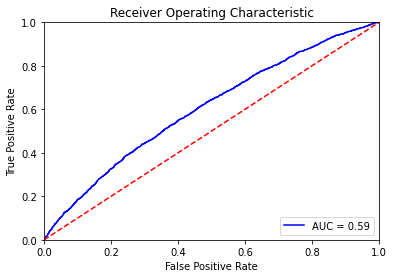

In [90]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ =roc_curve(y_test,  y_pred_proba)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Break

In [91]:
print('Next attempt')

Next attempt


# Keep cat columns with less than 10 categories

In [92]:
df = df_dupe

In [93]:
c = []
for i in range(s-39, s+ 1):
    value = 0
    value = 'Var{}'.format(i)
    if value in df.columns:
        c.append(value)

In [94]:
def top_labels_train(X_train, col, max_val):
    top_all = []
    top = list(X_train[col].value_counts().sort_values(ascending=False).head(max_val).index)
    return X_train.apply(lambda x: np.NaN if x[col] not in top else x[col], axis=1)

In [95]:
for x in c:
    df[x] = top_labels_train(df, x, 10)

In [96]:
df = df.dropna(axis=1)

In [97]:
X_train, X_test = train_test_split(df ,test_size=0.2)


In [98]:
c = []
for i in range(s-39, s+ 1):
    value = 0
    value = 'Var{}'.format(i)
    if value in df.columns:
        c.append(value)

In [99]:
df_churn = X_train[X_train['churn']==1]
df_not = X_train[X_train['churn']==-1]
df_upsampled = resample(df_churn, replace=True, n_samples=df_not.shape[0])

X_train = pd.concat([df_not, df_upsampled])

In [100]:
y_train = X_train['churn']
X_train = X_train.drop(['churn'],axis=1)


In [101]:
y_test = X_test['churn']
X_test = X_test.drop(['churn'],axis=1)


In [102]:
X_train = X_train.reset_index()

In [103]:
X_test = X_test.reset_index()

In [104]:
ohe1 = OneHotEncoder()
codes = ohe1.fit_transform(X_train[c]).toarray()
feature_names = ohe1.get_feature_names(c)
#X_test[c]= OneHotEncoder().fit_transform(X_test[c])

In [105]:
X_train = pd.concat([X_train.drop(c, axis=1), pd.DataFrame(codes, columns=feature_names)], axis=1)

In [106]:
ohe2 = OneHotEncoder()
codes2 = ohe2.fit_transform(X_test[c]).toarray()
feature_names2 = ohe2.get_feature_names(c)

In [107]:
X_test = pd.concat([X_test.drop(c, axis=1), pd.DataFrame(codes2, columns=feature_names2)], axis= 1)

In [108]:
model = LogisticRegression(solver='liblinear',max_iter=200, verbose=10 )
model.fit(X_train, y_train)

[LibLinear]

c:\Users\munch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=200, solver='liblinear', verbose=10)

In [109]:
X_test[list(set(X_train.columns) - set(X_test.columns))] = 0

In [110]:
y_pred = model.predict(X_test)

In [111]:
roc_auc_score(y_test, y_pred)

0.6095082585358722

In [112]:
from sklearn.metrics import roc_curve

In [113]:
y_pred_proba = model.predict_proba(X_test)[::,1]


In [116]:
fpr1, tpr1, _ =roc_curve(y_test,  y_pred_proba)


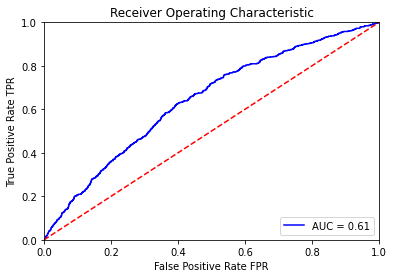

In [117]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate TPR')
plt.xlabel('False Positive Rate FPR')
plt.show()